1. 提高决策树拟合能力，对boost模型的的拟合能力由质的提升
2. boost模型的拟合能力主要通过n_estimator和learning_rate调节

 仅在jupyter中使用，用于将plt产生的图形显示在Python console 中

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles


x1,y1 = make_gaussian_quantiles(cov=2,n_samples = 500, n_features = 2,n_classes = 2)
x2,y2 = make_gaussian_quantiles(mean = (3,3),cov = 2, n_samples = 400,n_features = 2,n_classes = 2)

x = np.concatenate((x1,x2))
y = np.concatenate((y1,-y2+1))

#plt.scatter(x[:, 0],x[:, 1], marker='o', c=y)
#plt.show()


In [6]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2,min_samples_split = 20,min_samples_leaf = 5),
                        algorithm="SAMME",n_estimators = 200,learning_rate=0.8)
bdt.fit(x,y)
print('score of test is:   ',bdt.score(x,y))

score of test is:    0.9388888888888889


In [20]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3,min_samples_split = 20,min_samples_leaf = 5),
                        algorithm="SAMME",n_estimators = 200,learning_rate=0.8)
bdt.fit(x,y)
print('score of test is:   ',bdt.score(x,y))

score of test is:    0.99


In [21]:
y.shape

(900,)

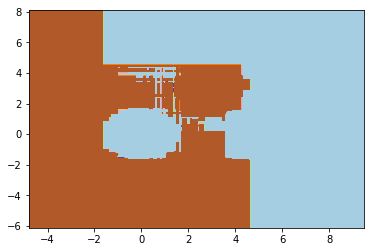

In [24]:

x1_min, x1_max = x[:,0].min()-1,x[:,0].max()+1
x2_min, x2_max = x[:,1].min()-1,x[:,1].max()+1

xx,yy = np.meshgrid(np.arange(x1_min,x1_max,0.02),np.arange(x2_min,x2_max,0.02))

z = bdt.predict(np.c_[xx.reshape(-1),yy.reshape(-1)])
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, cmap=plt.cm.Paired)

plt.show()


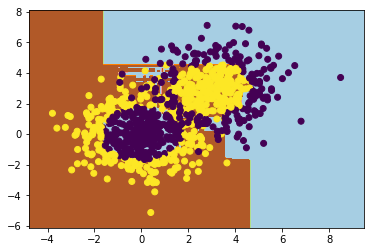

In [25]:

plt.contourf(xx, yy, z, cmap=plt.cm.Paired)
plt.scatter(x[:,0],x[:,1],marker = 'o',c=y)
plt.show()

In [13]:
bdt.score(x,y)

0.9555555555555556

In [14]:
dt = DecisionTreeClassifier(max_depth=2,min_samples_split = 20,min_samples_leaf = 5)
dt.fit(x,y)
dt.score(x,y)

0.7788888888888889

In [19]:
dt = DecisionTreeClassifier(max_depth=3,min_samples_split = 20,min_samples_leaf = 5)
dt.fit(x,y)
dt.score(x,y)

0.8711111111111111